In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

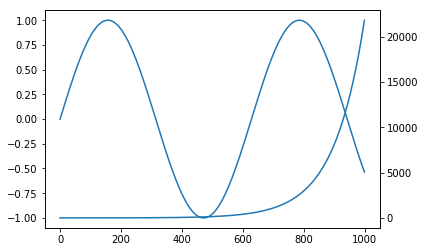

In [6]:
xs = np.arange(0,10,0.01)
plt.plot(np.sin(xs))
ax = plt.gca().twinx()
ax.plot(np.exp(xs))

In [6]:
import pandas as pd

In [8]:
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

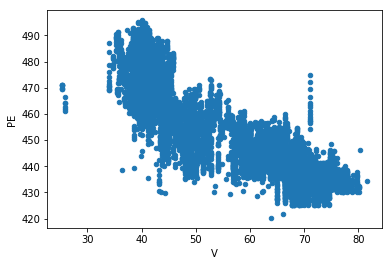

In [9]:
data.plot.scatter('V', 'PE')

In [10]:
smooth = data.groupby('V', as_index=False).mean()
smooth = smooth[smooth.V > 30]

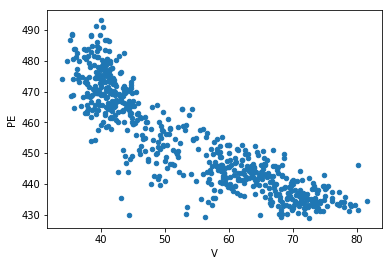

In [11]:
smooth.plot.scatter('V', 'PE')

In [12]:
from statsmodels.regression import linear_model

In [13]:
?linear_model

In [ ]:
smooth['const'] = 1

In [21]:
smooth['VS'] = smooth.V**2

In [22]:
model = linear_model.OLS(smooth.PE, smooth[['const', 'V', 'VS']])

In [23]:
result = model.fit()

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1384.
Date:                Wed, 15 Mar 2017   Prob (F-statistic):          4.25e-231
Time:                        10:35:56   Log-Likelihood:                -2120.3
No. Observations:                 632   AIC:                             4247.
Df Residuals:                     629   BIC:                             4260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        580.5616      6.519     89.063      0.000     567.761     593.362
V             -3.6328      0.245    -14.843      0.000      -4.113      -3.152
VS             0.0227      0.002     10.327      0.000       0.018       0.027
==============================================================================
Omnibus:                       48.434   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.984
Skew:                          -0.472   Prob(JB):                     8.72e-22
Kurtosis:                       4.671   Cond. No.                     8.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression().fit(smooth[['V', 'VS']], smooth.PE)

/Users/dirk/Virtualenvs/std/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [46]:
import numpy as np

In [53]:
np.array([1, 2], dtype=int) + np.array([1, 2], dtype=int)

array([2, 4])

In [54]:
np.array(range(10))**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [55]:
xs = np.arange(35, 80, 0.1)

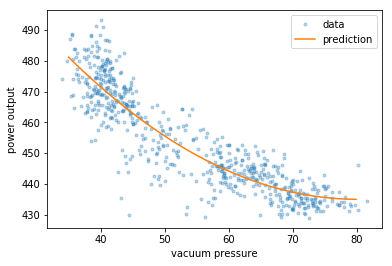

In [61]:
plt.plot(smooth.V, smooth.PE, '.', alpha=0.3, label='data')
plt.plot(xs, model.predict([[x, x**2] for x in xs]), label='prediction')
plt.legend()
plt.xlabel('vacuum pressure')
plt.ylabel('power output')
plt.savefig('my_first_plot.png', dpi=300)

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
tree = DecisionTreeRegressor(max_depth=2).fit(smooth[['V']], smooth.PE)

In [71]:
smooth[['V']].shape

(632, 1)

In [68]:
xs.shape

(450,)

In [70]:
xs.reshape(-1, 1).shape

(450, 1)

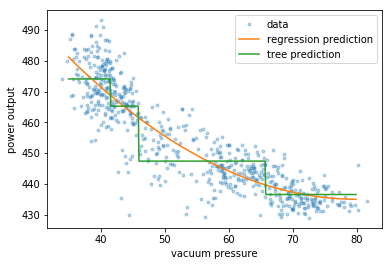

In [72]:
plt.plot(smooth.V, smooth.PE, '.', alpha=0.3, label='data')
plt.plot(xs, model.predict([[x, x**2] for x in xs]), label='regression prediction')
plt.plot(xs, tree.predict(xs.reshape(-1,1)), label='tree prediction')
plt.legend()
plt.xlabel('vacuum pressure')
plt.ylabel('power output')
plt.savefig('my_first_plot.png', dpi=300)

In [73]:
from sklearn.tree import export_graphviz

In [74]:
import pydotplus
from IPython.display import Image

In [75]:
dot = export_graphviz(tree, out_file=None)

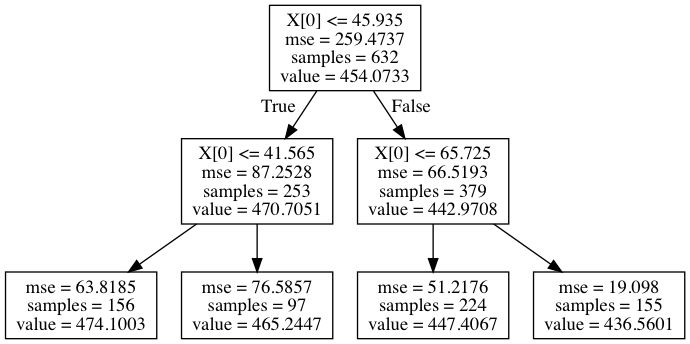

In [76]:
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

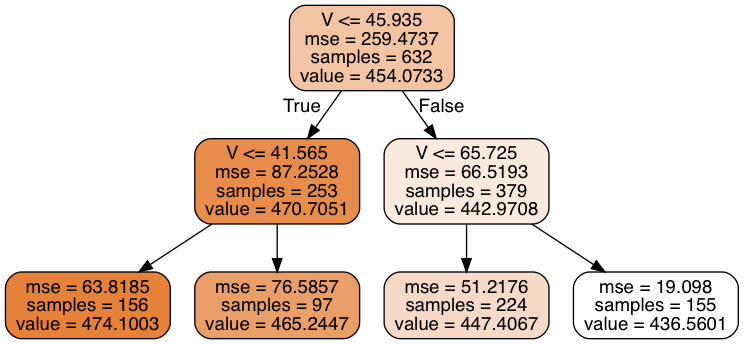

In [78]:
dot = export_graphviz(tree, out_file=None, rounded=True,
                      filled=True, feature_names=['V'])
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

In [82]:
?DecisionTreeRegressor

In [83]:
ds = range(2, 10)

In [84]:
from sklearn.model_selection import train_test_split

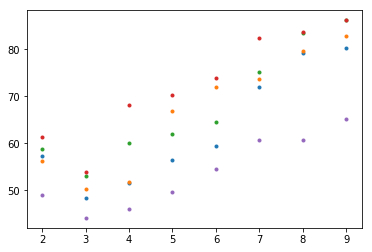

In [104]:
for i in range(5):
    test_errors = []
    train_errors = []
    Xtr, Xte, ytr, yte = train_test_split(smooth[['V']], smooth.PE, test_size=0.5)
    for d in ds:
        model = DecisionTreeRegressor(max_depth=d).fit(Xtr, ytr)
        test_errors.append(np.mean((model.predict(Xte) - yte)**2))
        train_errors.append(np.mean((model.predict(Xtr) - ytr)**2))
    plt.plot(ds, test_errors, '.')

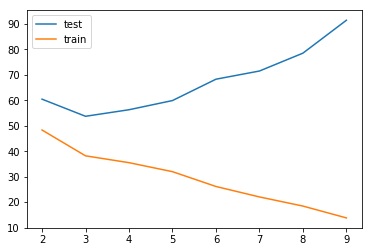

In [180]:
Xtr, Xte, ytr, yte = train_test_split(smooth[['V']], smooth.PE, test_size=0.3)
test_errors = []
train_errors = []
for d in ds:
    model = DecisionTreeRegressor(max_depth=d).fit(Xtr, ytr)
    test_errors.append(np.mean((model.predict(Xte) - yte)**2))
    train_errors.append(np.mean((model.predict(Xtr) - ytr)**2))
plt.plot(ds, test_errors, label='test')
plt.plot(ds, train_errors, label='train')
plt.legend()

In [105]:
from sklearn.model_selection import cross_val_score

In [112]:
cross_val_score(DecisionTreeRegressor(max_depth=2), smooth[['V']], smooth.PE, cv=10)

array([ -2.29525238e-02,  -7.35076349e-02,  -2.72064362e-01,
        -1.97407310e-01,  -1.50768435e+00,  -4.66434642e-04,
        -9.72384125e-01,  -6.22888760e-01,  -1.57843145e-04,
        -4.63327865e+00])

In [183]:
rsq_mean = [-cross_val_score(DecisionTreeRegressor(max_depth=d),
                            smooth[['V']], smooth.PE, cv=20).mean() for d in ds]
rsq_err = [-cross_val_score(DecisionTreeRegressor(max_depth=d),
                            smooth[['V']], smooth.PE, cv=20).std() for d in ds]    

<Container object of 3 artists>

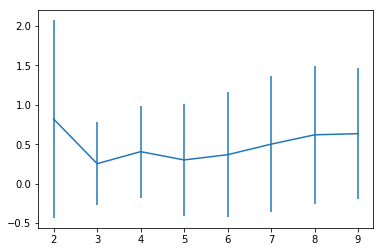

In [184]:
plt.errorbar(ds, rsq_mean, rsq_err)

In [7]:
red_wine = pd.read_csv('../data/winequality-red.csv', sep=';')

In [131]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115b02110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119ddcf50>]], dtype=object)

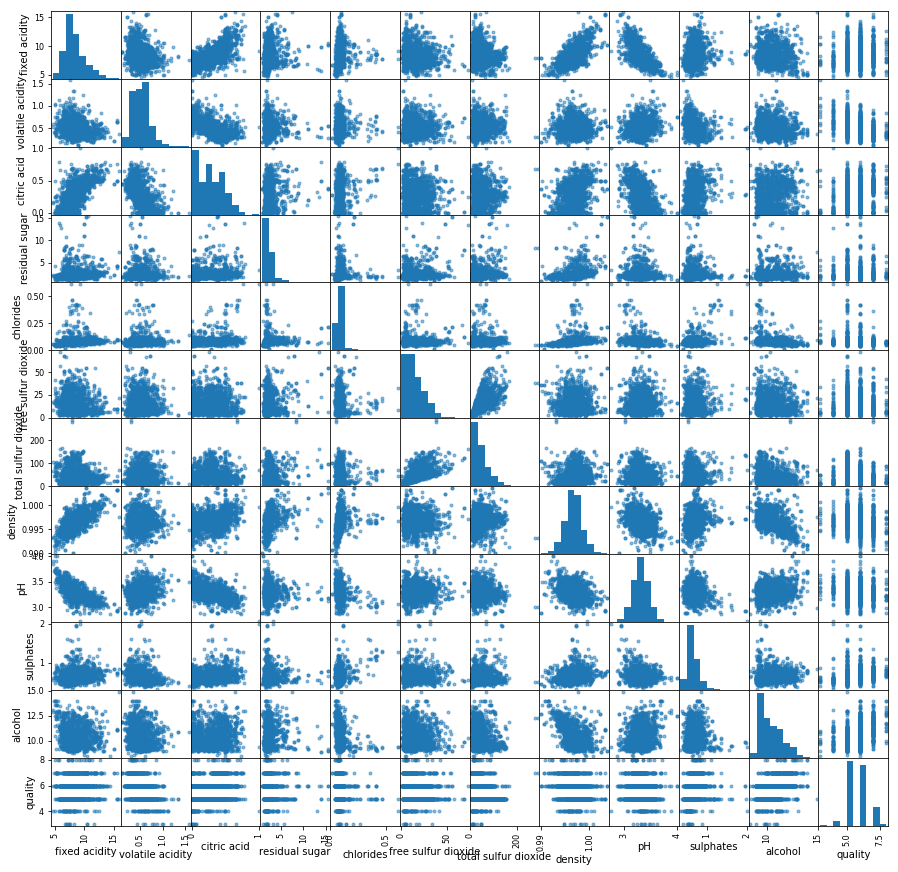

In [133]:
pd.tools.plotting.scatter_matrix(red_wine, diagonal='hist', figsize=(15,15))

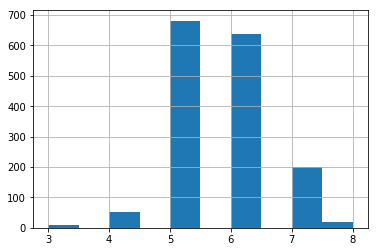

In [134]:
red_wine.quality.hist()

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
variables = list(red_wine.columns)

In [136]:
variables

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
variables.remove('quality')

In [138]:
model = DecisionTreeClassifier(max_depth=3).fit(red_wine[variables], red_wine.quality > 5)

In [140]:
model.predict(red_wine[variables].values[3,:])

/Users/dirk/Virtualenvs/std/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([False], dtype=bool)

In [141]:
red_wine[variables].values[3,:]

array([ 11.2  ,   0.28 ,   0.56 ,   1.9  ,   0.075,  17.   ,  60.   ,
         0.998,   3.16 ,   0.58 ,   9.8  ])

In [143]:
for var, imp in zip(variables, model.feature_importances_):
    if imp != 0:
        print var, imp

volatile acidity 0.0143357419289
chlorides 0.0168699775812
total sulfur dioxide 0.082009493006
sulphates 0.205540018351
alcohol 0.681244769133


In [148]:
wine_dot = export_graphviz(model, out_file=None,
                           rounded=True, filled=True,
                           feature_names=variables)

In [149]:
wine_graph = pydotplus.graph_from_dot_data(wine_dot)

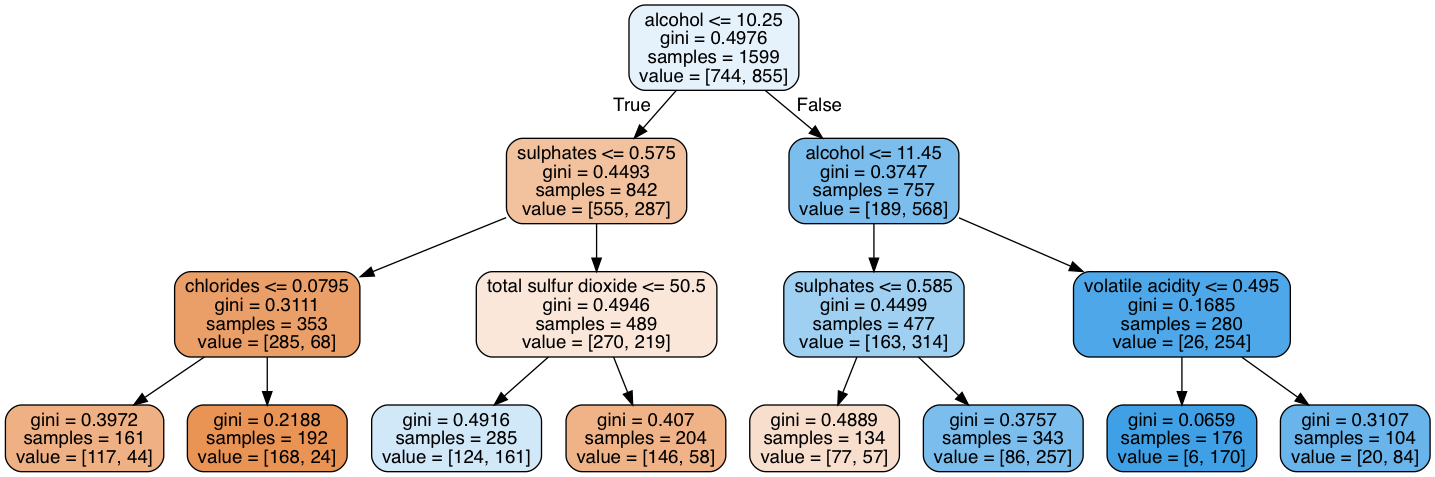

In [150]:
Image(wine_graph.create_png())

In [151]:
names, values = [], []
for var, imp in zip(variables, model.feature_importances_):
    if imp != 0:
        names.append(var)
        values.append(imp)

([<matplotlib.axis.XTick at 0x11b4ae9d0>,
 <a list of 5 Text xticklabel objects>)

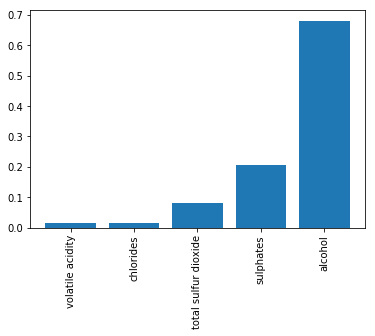

In [154]:
plt.bar(range(len(names)), values)
plt.xticks(range(len(names)), names, rotation='vertical')

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [156]:
?RandomForestClassifier

In [11]:
from sklearn.model_selection import train_test_split

In [29]:
Xtr, Xte, ytr, yte = train_test_split(red_wine[variables], red_wine.quality > 5, test_size=0.3)

In [30]:
rfc = RandomForestClassifier(n_estimators=20).fit(Xtr, ytr)

In [175]:
acc = (rfc.predict(Xte) == yte).mean()

In [176]:
acc

0.78749999999999998

In [172]:
trc = DecisionTreeClassifier(max_depth=3).fit(Xtr, ytr)

In [173]:
(trc.predict(Xte) == yte).mean()

0.72916666666666663

In [177]:
bdt = AdaBoostClassifier().fit(Xtr, ytr)

In [178]:
(bdt.predict(Xte) == yte).mean()

0.75208333333333333

In [179]:
?AdaBoostClassifier

In [185]:
?RandomForestClassifier

# Multiprocessing

In [1]:
from multiprocessing import Pool

In [187]:
?Pool

In [2]:
p = Pool(2)

In [189]:
def work(n_est):
    model = RandomForestClassifier(n_estimators=n_est).fit(Xtr, ytr)
    return (model.predict(Xte) == yte).mean()

In [3]:
ns = range(10, 100, 10)

In [191]:
ns

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [1]:
from sklearn.metrics import roc_curve

In [15]:
?roc_curve

In [42]:
fp_rates, tp_rates, thresholds = roc_curve(yte, rfc.predict_proba(Xte)[:,1], drop_intermediate=False)

In [44]:
?RandomForestClassifier.fit

In [36]:
from sklearn.metrics import auc

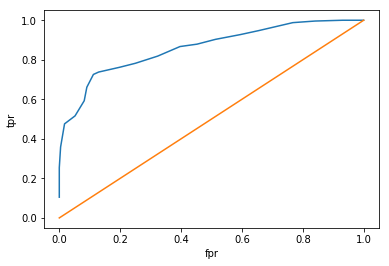

In [43]:
plt.plot(fp_rates, tp_rates)
plt.plot([0,1],[0,1])
plt.xlabel('fpr')
plt.ylabel('tpr')

In [41]:
this_is_a_fantastically_long_variable_name_that_i_just_make_up_to_prove_a_point = 12